In [0]:
!pip install tensorflow-gpu==2.0.0-beta1

Here is the list of image operations we'll be covering in this example:

TF Image :

- tf.image.adjust_brightness

- tf.image.adjust_contrast

- tf.image.adjust_gamma

- tf.image.adjust_hue

- tf.image.adjust_saturation

- tf.image.crop_to_bounding_box

- tf.image.draw_bounding_boxes

- tf.image.resize_with_pad

- tf.io.decode_image

- tf.image.flip_left_right

- tf.image.flip_up_down

- tf.image.image_gradients

- tf.image.sobel_edges

- tf.image.grayscale_to_rgb

- tf.image.rgb_to_grayscale

- tf.image.rgb_to_yiq

- tf.image.rgb_to_yuv

- tf.image.yiq_to_rgb

- tf.image.yuv_to_rgb

In [0]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!wget https://i.dailymail.co.uk/i/pix/2015/09/01/18/2BE1E88B00000578-3218613-image-m-5_1441127035222.jpg

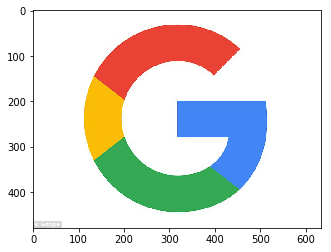

In [4]:
i1 = Image.open('./2BE1E88B00000578-3218613-image-m-5_1441127035222.jpg')
color = np.array(i1)
plt.imshow(color)

## Crop to bounding box

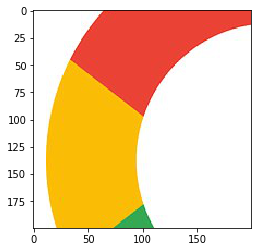

In [5]:
offset_height = 100
offset_width = 100
target_height = 200
target_width = 200

crop = tf.image.crop_to_bounding_box(
    color,
    offset_height,
    offset_width,
    target_height,
    target_width
)
plt.imshow(crop)

## Adjust Brightness

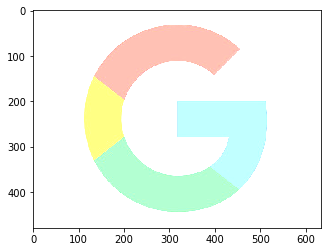

In [6]:
delta = 0.5
adj_bright = tf.image.adjust_brightness(color, delta)
plt.imshow(adj_bright)

## Adjust Contrast

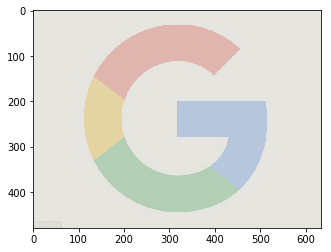

In [7]:
factor = 0.25
adj_contrast = tf.image.adjust_contrast(color, factor)
plt.imshow(adj_contrast)

## Adjust Gamma

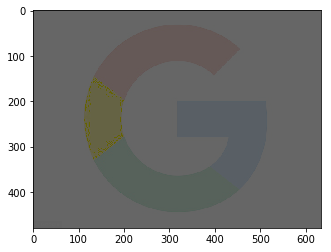

In [8]:
gamma, gain = 0.1, 0.4
new = tf.image.convert_image_dtype(color, tf.dtypes.float32)
adj_gamma = tf.image.adjust_gamma(new,gamma,gain)
final = tf.image.convert_image_dtype(adj_gamma, tf.dtypes.uint8)
plt.imshow(final)

## Adjust Hue

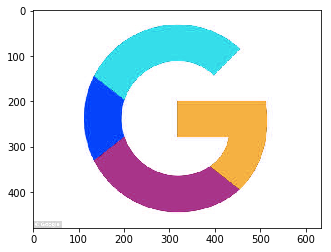

In [9]:
delta = 0.5
new = tf.image.convert_image_dtype(color, tf.dtypes.float32)
adj_hue = tf.image.adjust_hue(new, delta)
final = tf.image.convert_image_dtype(adj_hue, tf.dtypes.uint8)
plt.imshow(final)

## Draw bounding boxes

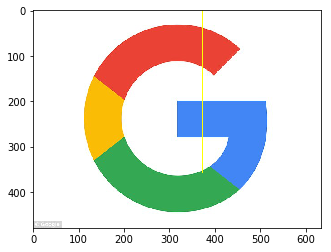

In [24]:
boxes = [[[0,0,0.75,0.59]]]
new = tf.image.convert_image_dtype(color, tf.dtypes.float32)

bb_im = tf.image.draw_bounding_boxes(tf.expand_dims(new, 0), boxes, colors=None)
final = tf.image.convert_image_dtype(bb_im, tf.dtypes.uint8)
final_red = tf.squeeze(final,0)
plt.imshow(final_red)

## Resize and Pad

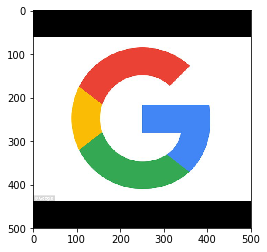

In [11]:
new = tf.image.convert_image_dtype(color, tf.dtypes.float32)
resize_and_pad = tf.image.resize_with_pad(new, 500,500)
final = tf.image.convert_image_dtype(resize_and_pad, tf.dtypes.uint8)
plt.imshow(final)

## Rgb to Grayscale conversion

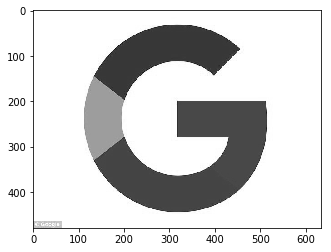

In [13]:
new = tf.image.convert_image_dtype(color, tf.dtypes.float32)
im = tf.image.rgb_to_grayscale(new)
final = tf.image.convert_image_dtype(im, tf.dtypes.uint8)
fi = tf.squeeze(final,2)
plt.imshow(fi, cmap='gray')

## RGB to YUV conversion

W0822 16:55:36.231153 139757574817664 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


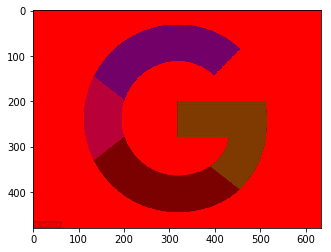

In [14]:
new = tf.image.convert_image_dtype(color, tf.dtypes.float32)
yuv = tf.image.rgb_to_yuv(new)
plt.imshow(yuv)

## YUV to RGB Conversion

W0822 16:55:39.678151 139757574817664 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


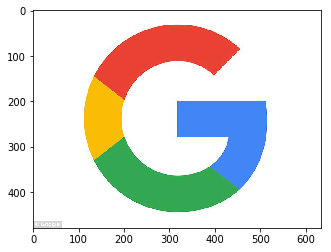

In [15]:
new = tf.image.convert_image_dtype(yuv, tf.dtypes.float32)
rgb = tf.image.yuv_to_rgb(new)
plt.imshow(rgb)

## Conversion from RGB to YIQ

W0822 16:55:43.223475 139757574817664 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


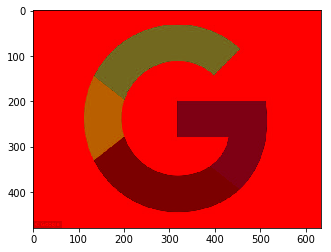

In [16]:
new = tf.image.convert_image_dtype(color, tf.dtypes.float32)
yiq = tf.image.rgb_to_yiq(new)
# final = tf.image.convert_image_dtype(im, tf.dtypes.uint8)
plt.imshow(yiq)

## Flip Image Upside-down

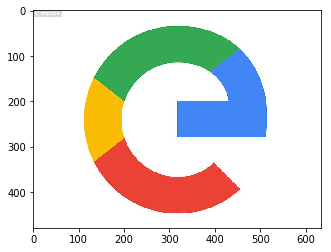

In [17]:
flip_ud = tf.image.flip_up_down(color)
plt.imshow(flip_ud)

## Flip Image Left-Right

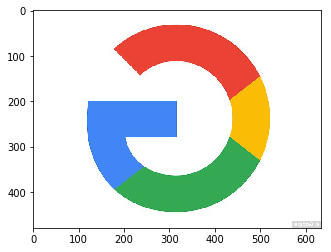

In [18]:
flip_lr = tf.image.flip_left_right(color)
plt.imshow(flip_lr)

## Image Gradients

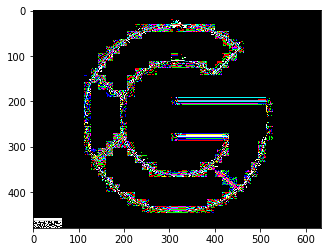

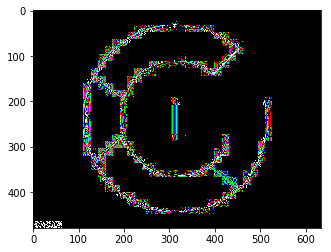

In [19]:
new = tf.expand_dims(color,0)
final = tf.image.image_gradients(new)
final0 = tf.squeeze(final[0],0)
final1 = tf.squeeze(final[1],0)
plt.imshow(final0)
plt.show()
plt.imshow(final1)
plt.show()

## Sobbel Filter

W0822 16:56:05.349457 139757574817664 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


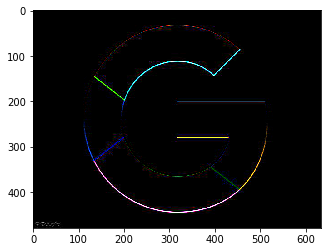

W0822 16:56:05.623901 139757574817664 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


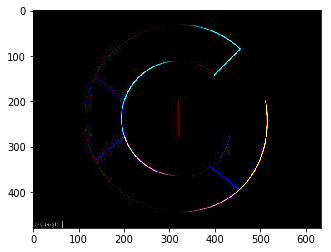

In [20]:
new = tf.image.convert_image_dtype(color, tf.dtypes.float32)
images = tf.expand_dims(new,0)
sobel = tf.image.sobel_edges(images)
final = tf.squeeze(sobel,0)
plt.imshow(final[:,:,:,0])
plt.show()
plt.imshow(final[:,:,:,1])
plt.show()